In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

In [3]:
# Grid of x, y points
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

In [11]:
# Create a multipole with nq charges of alternating sign, equally spaced
# on the unit circle.
nq = 3
charges = []
for i in range(nq):
    q = i%2 * 2 - 1
    charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

[[ 0.06400387  0.06547617  0.0669745  ... -0.08400722 -0.08695129
  -0.08944272]
 [ 0.06589505  0.06747007  0.06907703 ... -0.09108289 -0.0940907
  -0.09659418]
 [ 0.0678156   0.06949794  0.07121863 ... -0.09892992 -0.10198166
  -0.10447128]
 ...
 [ 0.0678156   0.06949794  0.07121863 ... -0.09892992 -0.10198166
  -0.10447128]
 [ 0.06589505  0.06747007  0.06907703 ... -0.09108289 -0.0940907
  -0.09659418]
 [ 0.06400387  0.06547617  0.0669745  ... -0.08400722 -0.08695129
  -0.08944272]]
[[-0.04431373 -0.04359803 -0.04277995 ...  0.04606243  0.04577224
   0.04544675]
 [-0.04670236 -0.04599265 -0.04517306 ...  0.0479187   0.04757572
   0.04719735]
 [-0.04925242 -0.04855334 -0.04773636 ...  0.04985714  0.04945627
   0.04902017]
 ...
 [-0.2543666  -0.2660682  -0.27813635 ...  0.13852725  0.13296408
   0.12769491]
 [-0.23969149 -0.24983565 -0.26018005 ...  0.13450277  0.12926698
   0.12429412]
 [-0.2256013  -0.23434037 -0.24314571 ...  0.13044106  0.12552761
   0.12084744]]
[[ 0.2256013   0.2

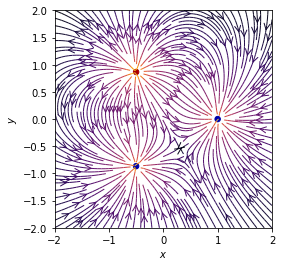

In [13]:
# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()